# This example contains the model with the leaver (TF-element)


In [2]:

import sys
sys.path.append("../")
from core.base import ElementFactory
from core.BondGraph2 import BondGraphModel
from rules.engine import RuleEngine
from equations.generator import EquationGenerator
from equations.statespace import CauchyFormGenerator
from equations.statespace import StateSpaceBuilder
from numerical.simulation import BondGraphSimulator


from inout.visualizer import draw_bond_graph, custom_layered_layout
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

Example 3: 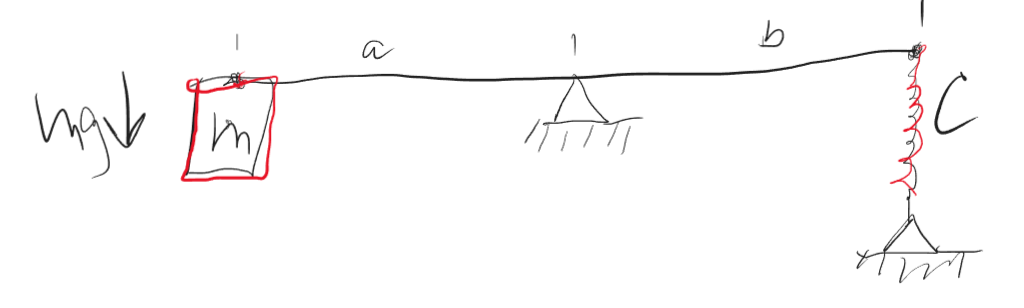

In [3]:
# Создаем модель
model = BondGraphModel(name='TF example')

In [4]:
#Create some elements
TF_1 = ElementFactory.create('TF', name='TF_1', )
# TF_1 = bg.BGelement('TF')
SE_1 = ElementFactory.create('SE', name='SE_1', )
# SE_1 = bg.BGelement('SE')
# C_1 = bg.BGelement('C')
C_1 = ElementFactory.create('C', name='C_1', )
#R_1 = bg.BGelement('R', Position=[3,4])
# I_1 = bg.BGelement('I')
I_1 = ElementFactory.create('I', name='I_1',)

OneJ_1 = ElementFactory.create('1', name='1j_4')
OneJ_2 = ElementFactory.create('1', name='1j_5')
OneJ_3 = ElementFactory.create('1', name='1j_6', )
OneJ_4 = ElementFactory.create('1', name='1j_7', )
# OneJ_1 = bg.BGelement('1')
# OneJ_2 = bg.BGelement('1')
# OneJ_3 = bg.BGelement('1')
# OneJ_4 = bg.BGelement('1')

# ZeroJ_1 = bg.BGelement('0')
ZeroJ_1 = ElementFactory.create('0', name='0j_2',)

# SF_1 = bg.BGelement('SF')
SF_1 = ElementFactory.create('SF', name='SF_1', )
# print(C)

In [5]:
# add a connections between elements in model
# Connect elements (same as old version)
model.connect(SE_1, OneJ_1)
model.connect(I_1, OneJ_1)
model.connect(TF_1, OneJ_1)
model.connect(TF_1, OneJ_2)
model.connect(OneJ_2, ZeroJ_1)
model.connect(ZeroJ_1, OneJ_3)
model.connect(ZeroJ_1, OneJ_4)
model.connect(C_1, OneJ_3)
# model.connect(R_1, OneJ_2)
model.connect(OneJ_4, SF_1)

In [6]:
engine = RuleEngine(model, debug=False)
engine.apply_all()

In [7]:
problems = engine.find_invalid_bonds()
if problems:
    print("Detected some unvalid bonds:")
    for p in problems:
        print(p)
else:
    print("Allrights!")

Detected some unvalid bonds:
{'bond_id': 2, 'problem': 'Both ports have the same direction', 'direction': 'Output', 'elements': ('TF_1', '1j_4')}
{'bond_id': 4, 'problem': 'Both ports have the same direction', 'direction': 'Input', 'elements': ('1j_5', '0j_2')}
{'bond_id': 4, 'problem': 'Both ports have the same causality (for non-TF/GY)', 'causality': 'Uncausal', 'elements': ('1j_5', '0j_2')}


In [8]:
# ONLY FOR DEBUGING (IF U NEED) just printes the internal params of model
model.debug_display_elements_with_ports()

SE_1: Port Port_0 -> direction=Output, causality=Uncausal
1j_4: Port Port_1 -> direction=Input, causality=Causal
1j_4: Port Port_3 -> direction=Output, causality=Uncausal
1j_4: Port Port_5 -> direction=Output, causality=Causal
I_1: Port Port_2 -> direction=Input, causality=Causal
TF_1: Port Port_4 -> direction=Output, causality=Causal
TF_1: Port Port_6 -> direction=Input, causality=Uncausal
1j_5: Port Port_7 -> direction=Output, causality=Causal
1j_5: Port Port_8 -> direction=Input, causality=Uncausal
0j_2: Port Port_9 -> direction=Input, causality=Uncausal
0j_2: Port Port_10 -> direction=Output, causality=Causal
0j_2: Port Port_12 -> direction=Output, causality=Uncausal
1j_6: Port Port_11 -> direction=Input, causality=Uncausal
1j_6: Port Port_15 -> direction=Output, causality=Causal
1j_7: Port Port_13 -> direction=Input, causality=Causal
1j_7: Port Port_16 -> direction=Output, causality=Uncausal
C_1: Port Port_14 -> direction=Input, causality=Uncausal
SF_1: Port Port_17 -> direction=I

In [9]:
# ONLY FOR DEBUGING (IF U NEED)
model.debug_display_bonds()

Bond 0:
  FROM: SE_1 [Port_0] (direction=Output, causality=Uncausal)
  TO:   1j_4 [Port_1] (direction=Input, causality=Causal)
----------------------------------------
Bond 1:
  FROM: 1j_4 [Port_3] (direction=Output, causality=Uncausal)
  TO:   I_1 [Port_2] (direction=Input, causality=Causal)
----------------------------------------
Bond 2:
  FROM: TF_1 [Port_4] (direction=Output, causality=Causal)
  TO:   1j_4 [Port_5] (direction=Output, causality=Causal)
----------------------------------------
Bond 3:
  FROM: 1j_5 [Port_7] (direction=Output, causality=Causal)
  TO:   TF_1 [Port_6] (direction=Input, causality=Uncausal)
----------------------------------------
Bond 4:
  FROM: 1j_5 [Port_8] (direction=Input, causality=Uncausal)
  TO:   0j_2 [Port_9] (direction=Input, causality=Uncausal)
----------------------------------------
Bond 5:
  FROM: 0j_2 [Port_10] (direction=Output, causality=Causal)
  TO:   1j_6 [Port_11] (direction=Input, causality=Uncausal)
--------------------------------

In [10]:
for bond in model.bonds:
    # Найти элементы, связанные с bond.from_port и bond.to_port
    from_elem = next((e for e in model.elements if bond.from_port in e.ports), None)
    to_elem = next((e for e in model.elements if bond.to_port in e.ports), None)
    print(f"Bond {bond.id}:")
    print(f"  FROM: {from_elem.name if from_elem else '???'} [{bond.from_port.name}]"
          f" (direction={bond.from_port.direction}, causality={bond.from_port.causality})")
    print(f"  TO:   {to_elem.name if to_elem else '???'} [{bond.to_port.name}]"
          f" (direction={bond.to_port.direction}, causality={bond.to_port.causality})")
    print("-" * 40)

Bond 0:
  FROM: SE_1 [Port_0] (direction=Output, causality=Uncausal)
  TO:   1j_4 [Port_1] (direction=Input, causality=Causal)
----------------------------------------
Bond 1:
  FROM: 1j_4 [Port_3] (direction=Output, causality=Uncausal)
  TO:   I_1 [Port_2] (direction=Input, causality=Causal)
----------------------------------------
Bond 2:
  FROM: TF_1 [Port_4] (direction=Output, causality=Causal)
  TO:   1j_4 [Port_5] (direction=Output, causality=Causal)
----------------------------------------
Bond 3:
  FROM: 1j_5 [Port_7] (direction=Output, causality=Causal)
  TO:   TF_1 [Port_6] (direction=Input, causality=Uncausal)
----------------------------------------
Bond 4:
  FROM: 1j_5 [Port_8] (direction=Input, causality=Uncausal)
  TO:   0j_2 [Port_9] (direction=Input, causality=Uncausal)
----------------------------------------
Bond 5:
  FROM: 0j_2 [Port_10] (direction=Output, causality=Causal)
  TO:   1j_6 [Port_11] (direction=Input, causality=Uncausal)
--------------------------------

In [11]:
# Causality and direction output for ports
for elem in model.elements:
    print(elem.name)
    for port in elem.ports:
        print(f"{elem.name}: Port {port.name} -> direction={port.direction}, causality={port.causality}")

SE_1
SE_1: Port Port_0 -> direction=Output, causality=Uncausal
1j_4
1j_4: Port Port_1 -> direction=Input, causality=Causal
1j_4: Port Port_3 -> direction=Output, causality=Uncausal
1j_4: Port Port_5 -> direction=Output, causality=Causal
I_1
I_1: Port Port_2 -> direction=Input, causality=Causal
TF_1
TF_1: Port Port_4 -> direction=Output, causality=Causal
TF_1: Port Port_6 -> direction=Input, causality=Uncausal
1j_5
1j_5: Port Port_7 -> direction=Output, causality=Causal
1j_5: Port Port_8 -> direction=Input, causality=Uncausal
0j_2
0j_2: Port Port_9 -> direction=Input, causality=Uncausal
0j_2: Port Port_10 -> direction=Output, causality=Causal
0j_2: Port Port_12 -> direction=Output, causality=Uncausal
1j_6
1j_6: Port Port_11 -> direction=Input, causality=Uncausal
1j_6: Port Port_15 -> direction=Output, causality=Causal
1j_7
1j_7: Port Port_13 -> direction=Input, causality=Causal
1j_7: Port Port_16 -> direction=Output, causality=Uncausal
C_1
C_1: Port Port_14 -> direction=Input, causality

In [12]:
element = model.find_element_by_port_name("Port_6")
element.name


'TF_1'

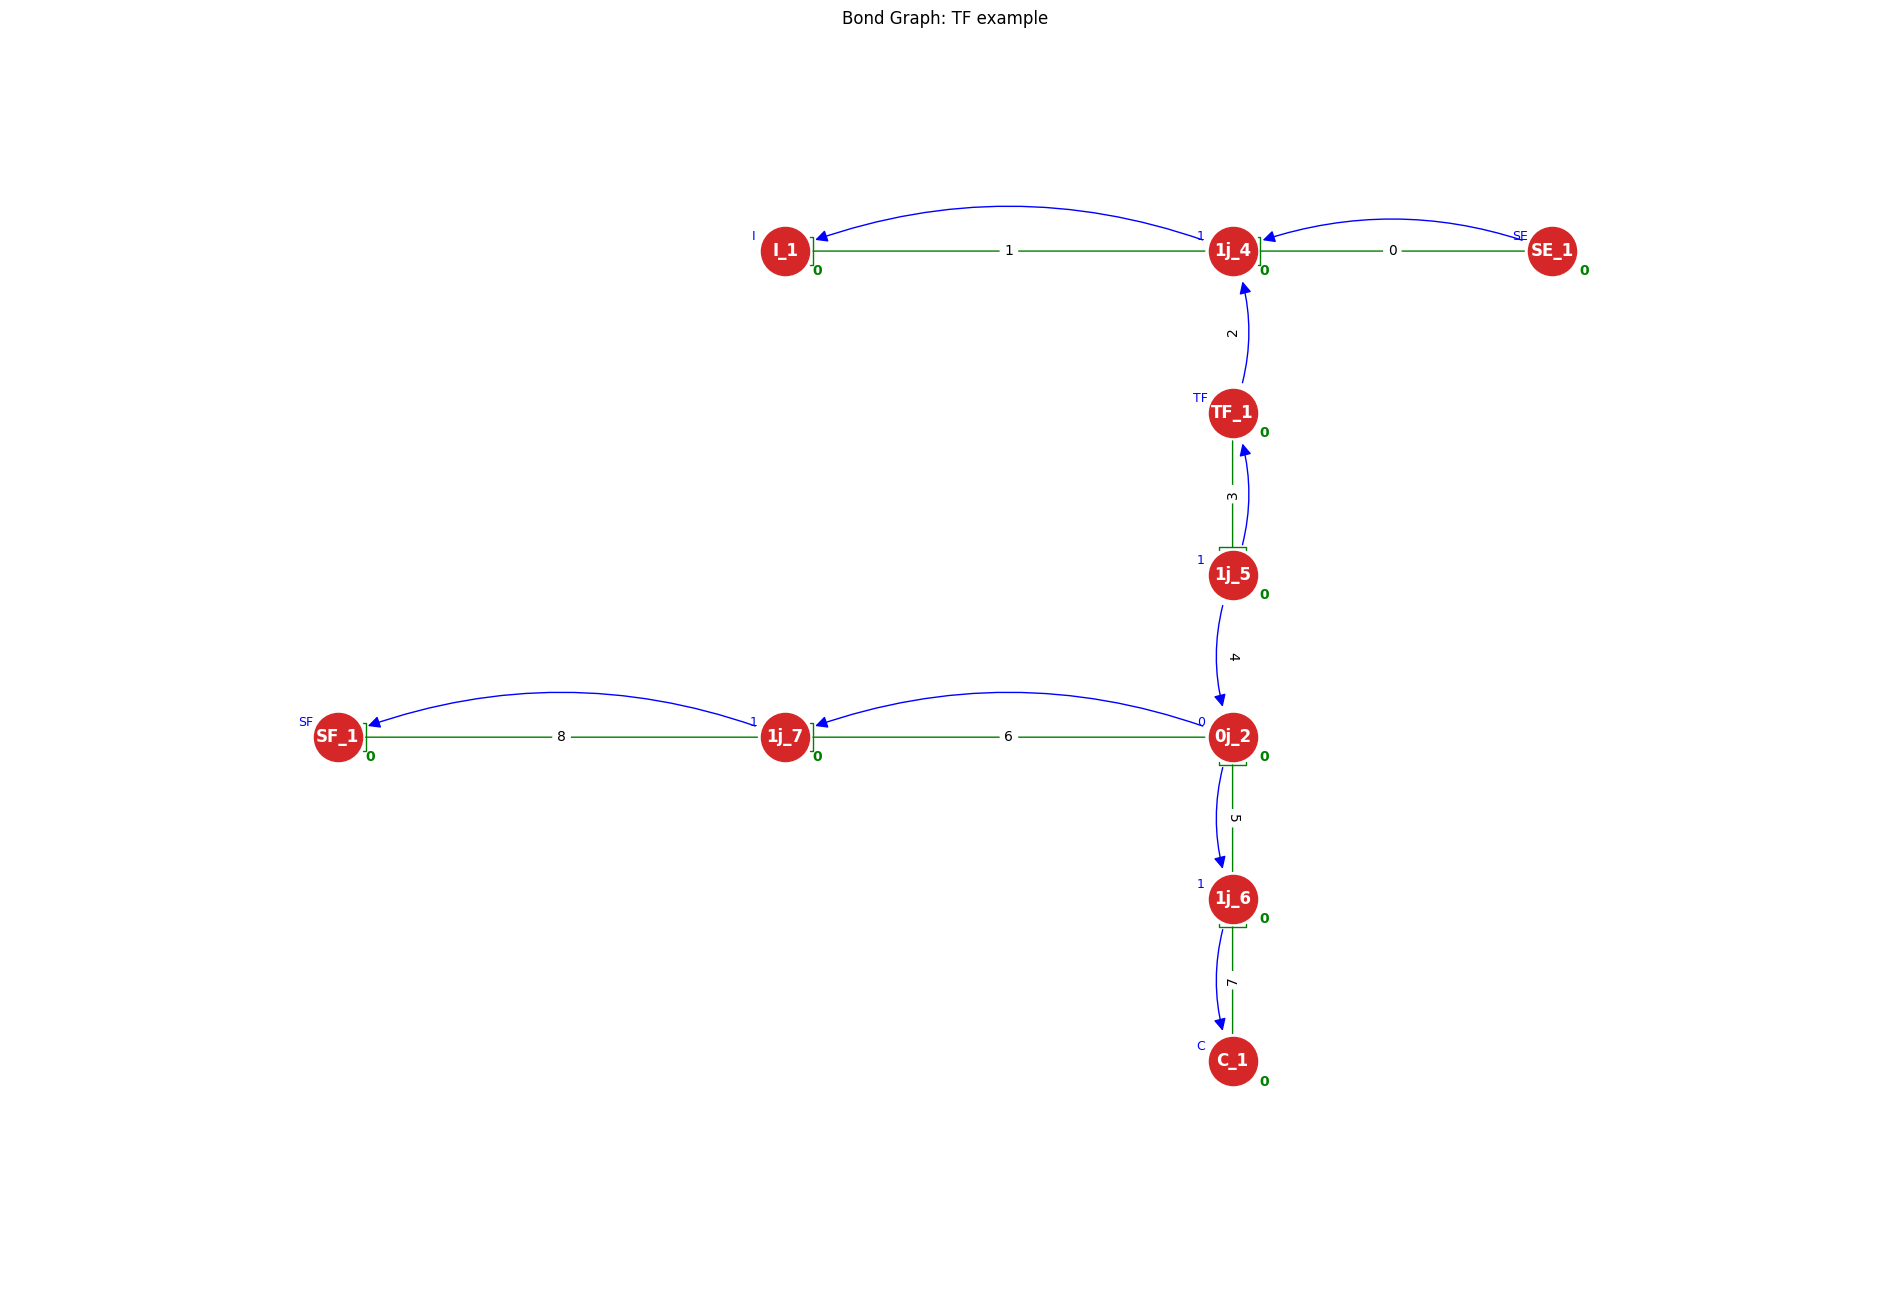

In [13]:

custom_layered_layout(model)

# Draw the graph
draw_bond_graph(model)

## State-space form sequence

In [16]:
# 5) Generate equations (NOT REQUIRED later... Cochy will do it)
eqgen = EquationGenerator(model, debug=False)
eqs = eqgen.generate_equations()
# eqgen.visualize_equations()
print(eqs)

Eq(f1, f0)
Eq(f2, f0)
Eq(f4, f3)
Eq(f7, f5)
Eq(f8, f6)
[Eq(e0, SE1), Eq(f1, p3/I3), Eq(e7, q2/C2), Eq(f8, SF9), Eq(f1, f0), Eq(f2, f0), Eq(e0 - e1 - e2, 0), Eq(f4, f3), Eq(-e3 + e4, 0), Eq(e5, e4), Eq(e6, e4), Eq(f4 - f5 - f6, 0), Eq(f7, f5), Eq(e5 - e7, 0), Eq(f8, f6), Eq(e6 - e8, 0)]


In [18]:
model.final_variables

[SE1, SF9, q2, p3, C2, I3, n0]

In [19]:
#just show
print("############## STATE EQUASIONS ############")
for i in cauchy_state_equastions.keys():
    print(i, '=', cauchy_state_equastions[i])
print("####################################################")
print("State variables: ", model.state_variables)

############## STATE EQUASIONS ############
dq2/dt = -SF9 + p3/(I3*n0)
dp3/dt = SE1 - n0*q2/C2
####################################################
State variables:  [q2, p3]


In [20]:
print('effort-flow list:', model.eff_flows_sp, '\nvariables list:', model.final_variables, '\n inputs:', model.input_variables)

effort-flow list: [f0, e8, e5, f2, f8, f4, e6, e2, f3, f6, e1, e4, e3, f5, f1, e0, f7, e7] 
variables list: [SE1, SF9, q2, p3, C2, I3, n0] 
 inputs: [SE1, SF9]


In [21]:
variables_exp

{f0: [f1],
 e8: [e6],
 e5: [e7],
 f2: [f0],
 f8: [SF9],
 f4: [f3],
 e6: [e4],
 e2: [e3*n0],
 f3: [f2/n0],
 f6: [f8],
 e1: [e0 - e2],
 e4: [e5],
 e3: [e4],
 f5: [f4 - f6],
 f1: [p3/I3],
 e0: [SE1],
 f7: [f5],
 e7: [q2/C2]}

## Make state-space eq in matrix from

In [22]:
model.make_state_statespace(cauchy_state_equastions)
print(f'Matrix A: {model.get_matrix_A()} \n Matrix B: {model.get_matrix_B()}\n input_variables: {model.input_variables} \n state_variables: {model.state_variables}')

(-1, SF9) --------------
(p3, 1/I3, 1/n0) --------------
() --------------
(-1, n0, q2, 1/C2) --------------
Matrix([[0, 1/(I3*n0)], [-n0/C2, 0]])
(-1, SF9) --------------
(p3, 1/I3, 1/n0) --------------
() --------------
(-1, n0, q2, 1/C2) --------------
Matrix([[0, -1], [1, 0]])
Matrix A: Matrix([[0, 1/(I3*n0)], [-n0/C2, 0]]) 
 Matrix B: Matrix([[0, -1], [1, 0]])
 input_variables: [SE1, SF9] 
 state_variables: [q2, p3]


In [23]:
model.get_matrix_A()

Matrix([
[     0, 1/(I3*n0)],
[-n0/C2,         0]])

In [24]:
model.get_matrix_B()

Matrix([
[0, -1],
[1,  0]])

## Make С-D-matrix
Now we can set the input variables and get С-D-matrix

In [25]:
output_variables = "e7,f7"
cauchy_form_output_eq = model.cauchy_form_output_eq(variables_exp, output_variables)

Input the names of output variables:
It mast be in list eff_flows:  [f0, e8, e5, f2, f8, f4, e6, e2, f3, f6, e1, e4, e3, f5, f1, e0, f7, e7] (Velocity of Force at some point)
U entered this:  ['e7', 'f7']
output variable=  e7
first match [q2/C2]
output variable=  f7
first match [f5]
next iteration with expression: f4 - f6
next iteration with expression: f3 - f8
next iteration with expression: -SF9 + f2/n0
next iteration with expression: -SF9 + f0/n0
next iteration with expression: -SF9 + f1/n0
next iteration with expression: -SF9 + p3/(I3*n0)


In [26]:
cauchy_form_output_eq

{e7: q2/C2, f7: -SF9 + p3/(I3*n0)}

In [27]:
model.make_output_statespace(cauchy_form_output_eq)
print(model.get_matrix_C(), model.get_matrix_D())

(-1, SF9) --------------
(p3, 1/I3, 1/n0) --------------
Matrix([[1/C2, 0], [0, 1/(I3*n0)]])
(-1, SF9) --------------
(p3, 1/I3, 1/n0) --------------
Matrix([[0, 0], [0, -1]])
Matrix([[0, 1/(I3*n0)], [-n0/C2, 0]]) Matrix([[0, -1], [1, 0]])


## Make numerical matrixes from symbolic

In [28]:
print('List of system parameters:', model.parameter_variables)
parameters_list = model.parameter_variables

parameters_values = [1/10, 0.1, 2]


List of system parameters: [C2, I3, n0]


In [29]:
# k = 10
# 1/k

In [30]:
model.input_variables

[SE1, SF9]

In [31]:
# initial state
# initial_state = np.random.rand(len(model.state_variables),1)
initial_state = np.zeros((len(model.state_variables),1)) # fill initials by zero
print("initial_state: ", initial_state)
time_steps=100
sampling_period=0.5
input_sequence =np.ones((time_steps, len(model.input_variables)))
# print("Input sequence:", input_sequence)
input_sequence[:, 1] = 0

initial_state:  [[0.]
 [0.]]


In [32]:
# set initial state values

initial_state[0] = 0
initial_state[1] = 1

In [33]:
def integrate(output,  initial_state = 0):
    integral = np.zeros(len(output))
    integral[0] = initial_state
    for i in range(1, len(output)):
        integral[i] = integral[i-1] + output[i]
    return integral

In [34]:
state, output = model.simulate(initial_state, input_sequence, time_steps, sampling_period, parameters_values)    


In [35]:
output_pos = integrate(output[1,:-1])


print(f'output size: {output[0,:-1].shape} state size: {initial_state.shape}')

output size: (100,) state size: (2, 1)


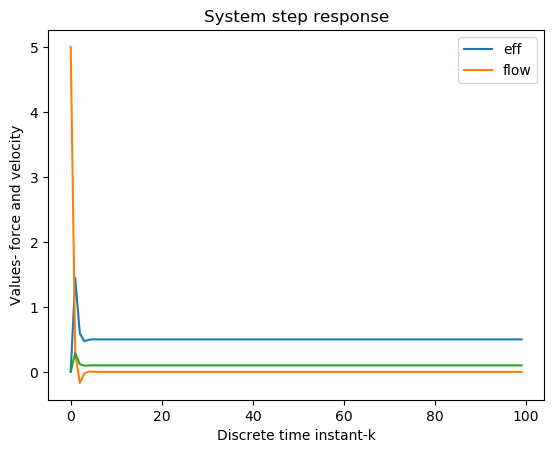

In [36]:
plt.plot(output[0,:-1])
plt.plot(output[1,:-1])

plt.plot(output_pos)

plt.xlabel('Discrete time instant-k')
plt.ylabel('Values- force and velocity')
plt.title('System step response')
plt.legend (('eff', 'flow'))